<a href="https://colab.research.google.com/github/pbcquoc/vietocr/blob/master/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inference

In [1]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

/home/vms/miniconda3/envs/vietocr/lib/python3.12/site-packages/gdown/__init__.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
config = Cfg.load_config_from_name('vgg_seq2seq')

Config file vietocr/config/base.yml exists. Loading from local file.
Config file vgg-seq2seq.yml not found locally. Downloading from Google Drive...


Downloading...
From: https://drive.google.com/uc?id=1e9Ypb_U4XUpC2Q9d71Ymosm-I6m7GNGF
To: /home/vms/hungtrieu07/ocr/vietocr/vgg-seq2seq.yml
100%|██████████| 709/709 [00:00<00:00, 6.55MB/s]

Downloaded config file to: vgg-seq2seq.yml
Config file vgg-seq2seq.yml downloaded and saved to vietocr/config/vgg-seq2seq.yml


Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [5]:
# config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=True
config['device'] = 'cuda:0'

In [6]:
detector = Predictor(config)

10935it [00:04, 2494.93it/s]


'Độc lập - Tự do - Hạnh phúc'

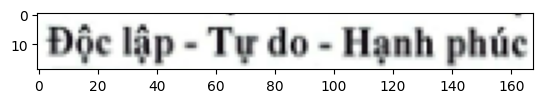

In [8]:
img = '/home/vms/hungtrieu07/ocr/dataset/0af5a116-210b-40b6-9052-34ef858ce80b_Signed_page_1_3.png'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [2]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

/home/vms/miniconda3/envs/vietocr/lib/python3.12/site-packages/gdown/__init__.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [3]:
config = Cfg.load_config_from_name('vgg_seq2seq')

Config file vietocr/config/base.yml exists. Loading from local file.
Config file vietocr/config/vgg-seq2seq.yml exists. Loading from local file.


In [9]:

dataset_params = {
    'name':'hw',
    'data_root':'../dataset/images',
    'train_annotation':'train_annotations.txt',
    'valid_annotation':'valid_annotations.txt'
}

params = {
         'batch_size': 32,
         'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
         'print_every':200,
         'valid_every':15*200,
          'iters':60000,
          'checkpoint':'./checkpoint/seq2seq_checkpoint.pth',    
          'export':'./weights/seq2seq.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [10]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'seq2seq',
 'transformer': {'encoder_hidden': 256,
  'decoder_hidden': 256,
  'img_channel': 256,
  'decoder_embedded': 256,
  'dropout': 0.1},
 'optimizer': {'max_lr': 0.001, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 60000,
  'export': './weights/seq2seq.pth',
  'checkpoint': './checkpoint/seq2seq_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000,
  'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '},
 'dataset': {'name': 'hw',
  'data_root': '..

You should train model from our pretrained 

In [ ]:
trainer = Trainer(config, pretrained=True)

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 15.46 GiB of which 13.62 MiB is free. Process 3370299 has 11.11 GiB memory in use. Including non-PyTorch memory, this process has 4.31 GiB memory in use. Of the allocated memory 4.02 GiB is allocated by PyTorch, and 23.44 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

: 

Save model configuration for inference, load_config_from_file

In [7]:
trainer.config.save('custom_config_seq2seq_12112025.yml')

Visualize your dataset to check data augmentation is appropriate

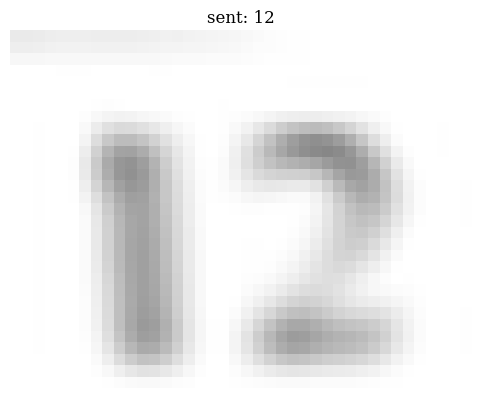

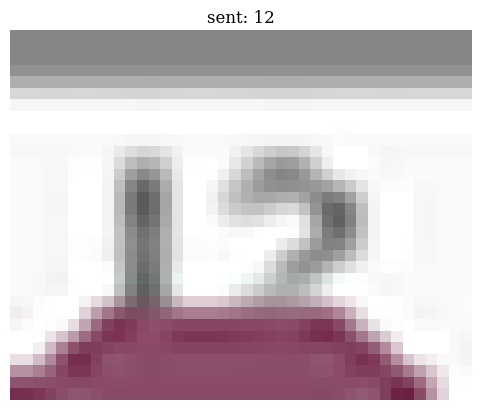

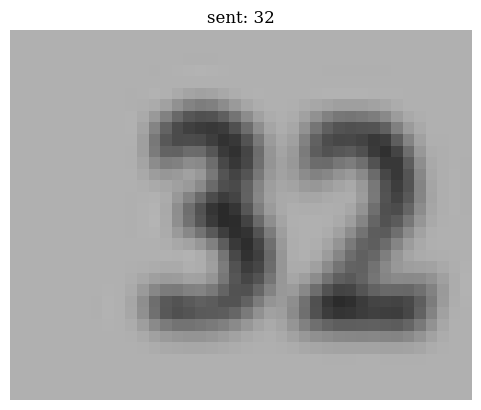

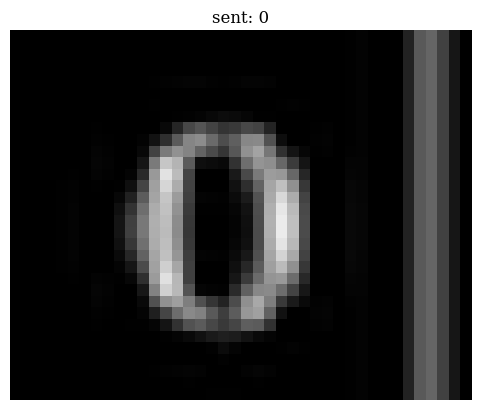

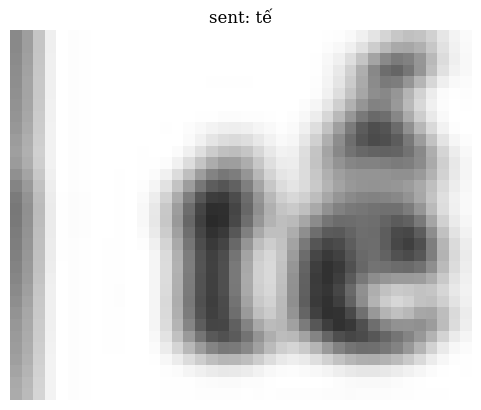

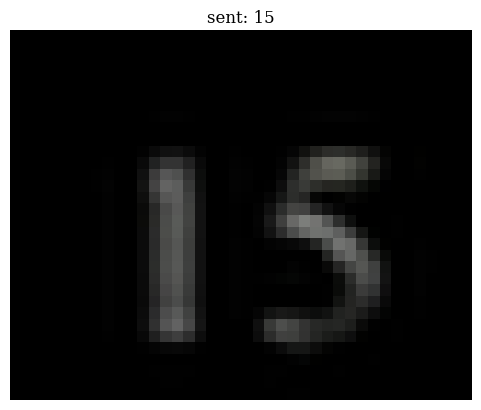

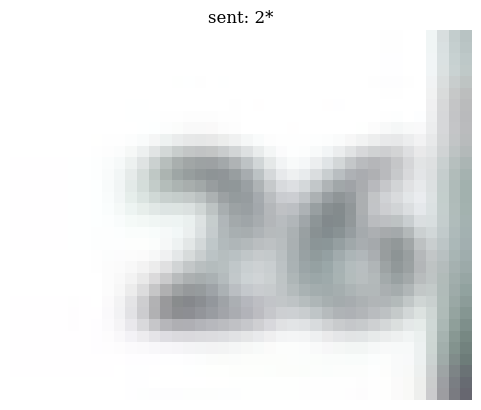

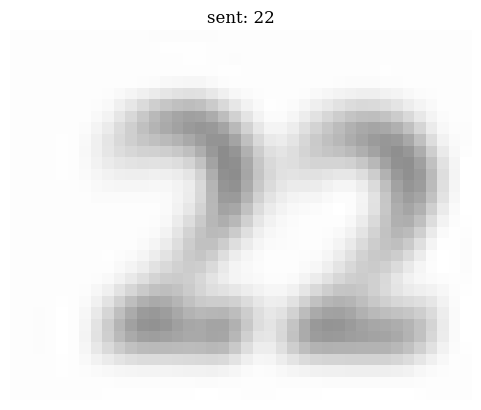

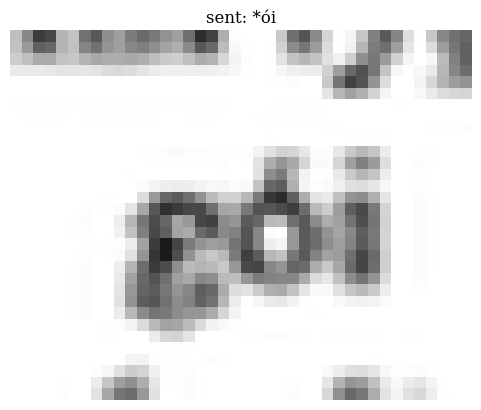

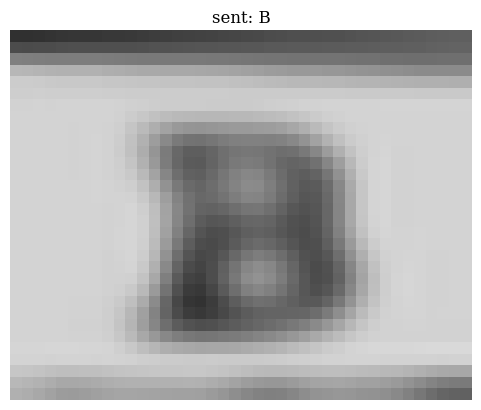

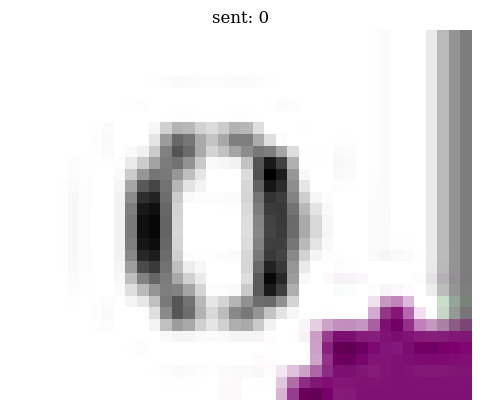

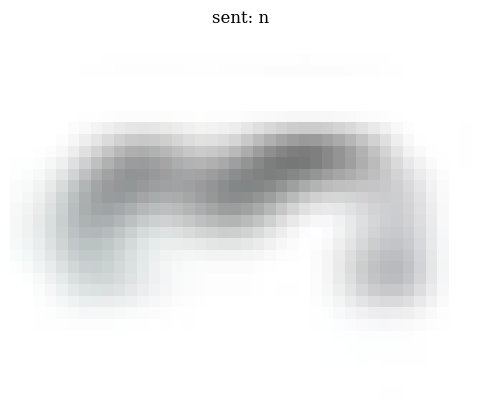

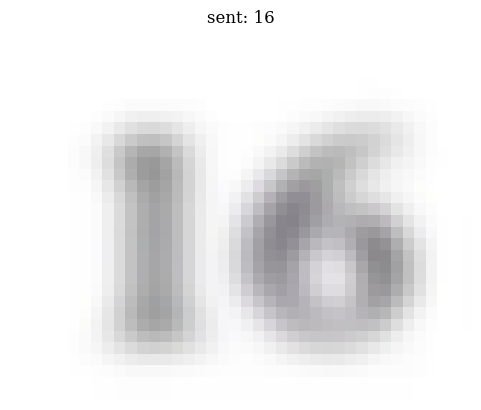

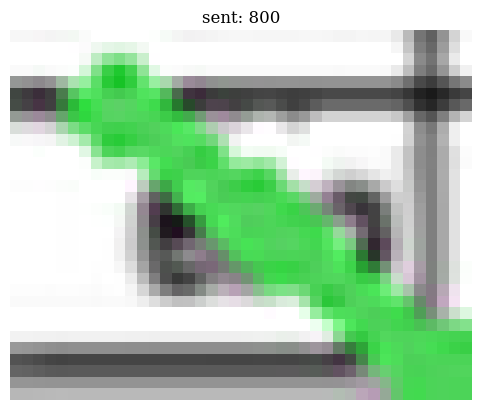

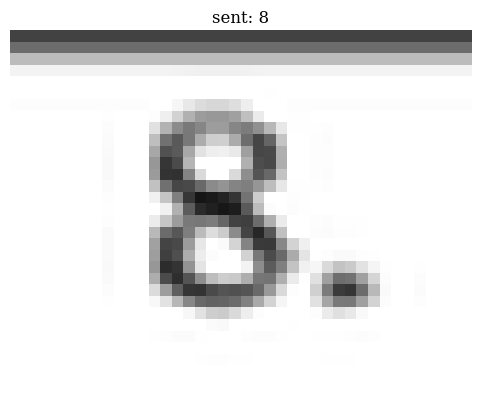

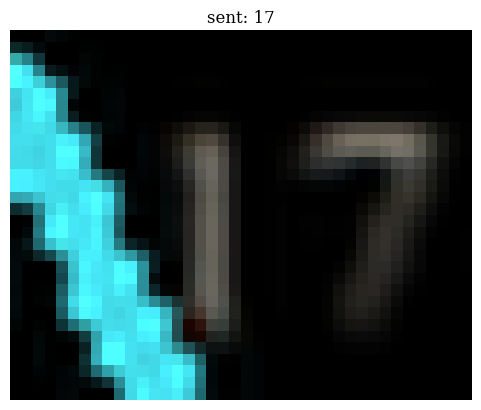

In [21]:
trainer.visualize_dataset()

Train now

In [8]:
trainer.train()

OutOfMemoryError: CUDA out of memory. Tried to allocate 16.00 MiB. GPU 0 has a total capacity of 15.46 GiB of which 15.62 MiB is free. Process 3370299 has 11.11 GiB memory in use. Including non-PyTorch memory, this process has 4.31 GiB memory in use. Of the allocated memory 4.01 GiB is allocated by PyTorch, and 35.52 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

Visualize prediction from our trained model


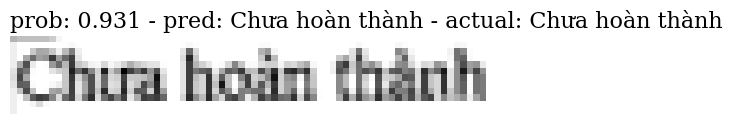

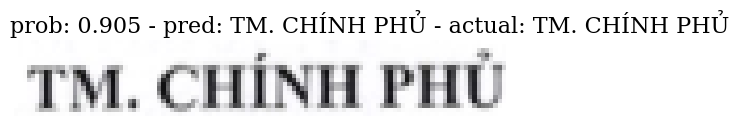

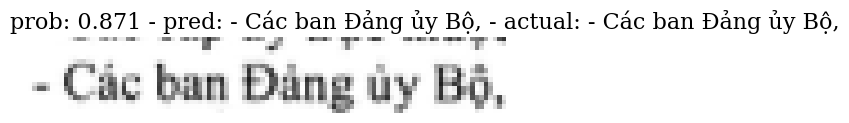

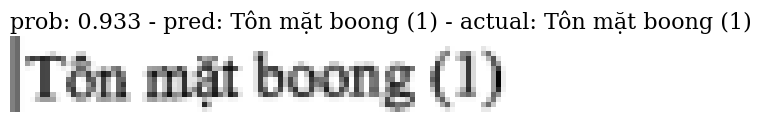

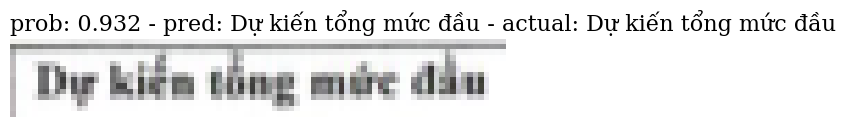

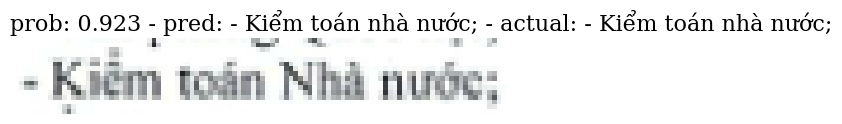

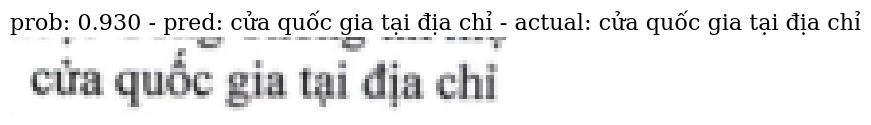

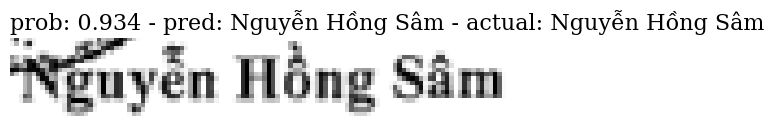

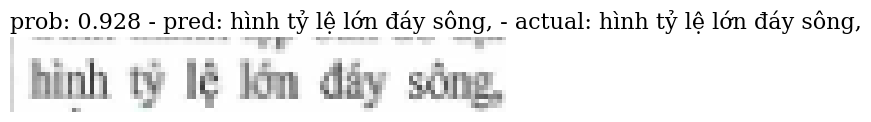

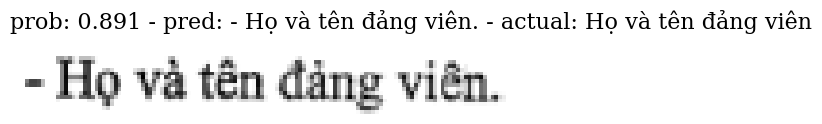

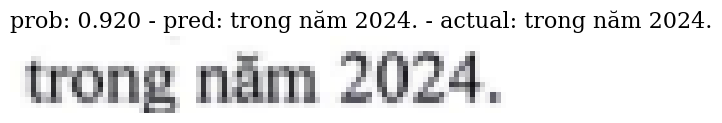

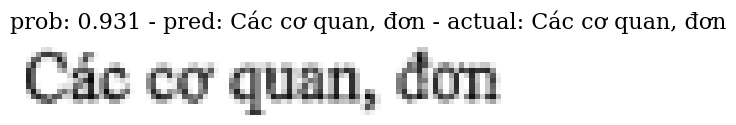

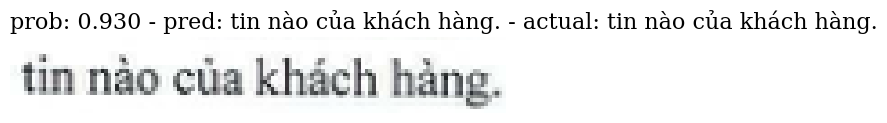

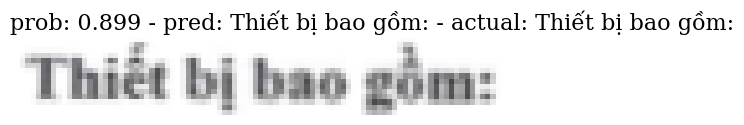

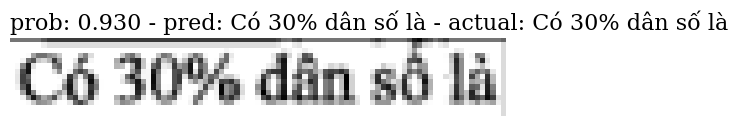

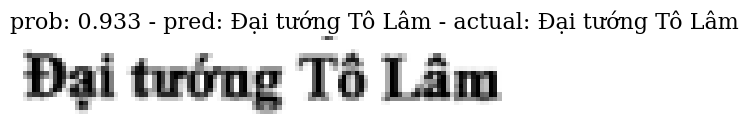

In [11]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [12]:
trainer.precision()

(0.7845707494407159, np.float32(0.95231134))